### 합성곱 신경망(CNN)

In [49]:
import numpy as np
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w = np.array([2, 1, 5, 3])

In [50]:
w_r = w[::-1]
print(w_r)

[3 5 1 2]


In [51]:
w_r = np.flip(w)
print(w_r)

[3 5 1 2]


In [57]:
N = len(x)
print(N)
F = len(w_r)
print(F)
O = N - F + 1
print(O)
for i in range(O):
    print(np.dot(x[i:i+4], w_r.reshape(-1,1)), end=' ')  # (4,)(4,1) => (1,)
#     print(np.dot(x[i:i+4], w_r), end=' ')  # (4,)(4,) => () 스칼라
#    print(np.sum(x[i:i+4]*w_r), end=' ')  # (4,)(4,) => () 스칼라

9
4
6
[63] [48] [49] [28] [21] [20] 

In [58]:
from scipy.signal import convolve
convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

In [59]:
from scipy.signal import correlate
correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

In [60]:
from scipy.signal import correlate
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

In [61]:
from scipy.signal import correlate
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

In [62]:
import numpy as np
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0], 
              [0, 0]])
from scipy.signal import correlate2d
correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [63]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0], 
              [0, 0]])
from scipy.signal import correlate2d
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [64]:
x = np.arange(7*7).reshape(7,7)
print(x)
w = np.ones((3,3))
print(w)
from scipy.signal import correlate2d
correlate2d(x, w, mode='valid')

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]
 [35 36 37 38 39 40 41]
 [42 43 44 45 46 47 48]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


array([[ 72.,  81.,  90.,  99., 108.],
       [135., 144., 153., 162., 171.],
       [198., 207., 216., 225., 234.],
       [261., 270., 279., 288., 297.],
       [324., 333., 342., 351., 360.]])

### 렐루 함수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0,x)

# x = np.array([-1,3,4,5,-2,3,4,5])
# y = relu(x)
# print(y)

x = np.arange(-5, 5, 0.01)
y = relu(x)
plt.plot(x,y)
plt.show()

### 합성곱 연산

In [65]:
a = np.array([1,2,3,4])
print(a)
print(a.shape)

[1 2 3 4]
(4,)


In [66]:
import tensorflow as tf
a = tf.constant([1,2,3,4])
print(a)
print(a.shape)

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
(4,)


In [67]:
a = np.array([1,2,3,4])
b = tf.constant(a)
print(b)
print(b.shape)
print(b.numpy())

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
(4,)
[1 2 3 4]


(1, 3, 3, 1)
(3, 3)
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


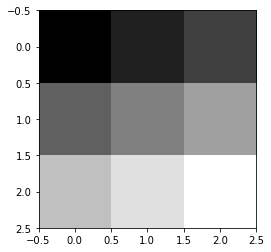

In [73]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1],[2],[3]],
                      [[4],[5],[6]],
                      [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
# print(image)
# print(image.numpy())
print(image.numpy().reshape(3,3).shape)
print(image.numpy().reshape(3,3))
plt.imshow(image.numpy().reshape(3,3), cmap='gray')
plt.show()

In [77]:
weight = np.array([[[[1.]], [[1.]]],[[[1.]],[[1.]]]])
print("weight.shape=", weight.shape) # (height, width, channel, FN)
print(weight.reshape(2,2))

weight.shape= (2, 2, 1, 1)
[[1. 1.]
 [1. 1.]]


conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


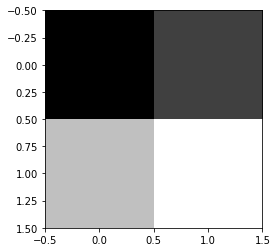

In [82]:
weight_init = tf.constant_initializer(weight)
# print(type(weight_init))
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape) # N-F+1=O  (1,2,2,1)
# print(conv2d.numpy())
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


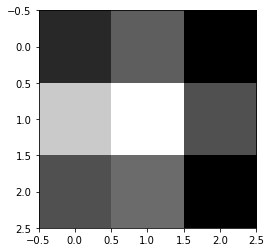

In [84]:
weight_init = tf.constant_initializer(weight)
# print(type(weight_init))
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape) # N-F+1=O  (1,2,2,1)
# print(conv2d.numpy())
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

In [85]:
image = tf.constant([[[[1],[2],[3]],
                      [[4],[5],[6]],
                      [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)

(1, 3, 3, 1)


In [88]:
weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],[[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print(weight.shape)  # (height, width, channel, FN)
# print(weight)
temp=np.transpose(weight,(3,0,1,2))
# print(temp)
for t in temp:
    print(t.reshape(2,2))

(2, 2, 1, 3)
[[1. 1.]
 [1. 1.]]
[[10. 10.]
 [10. 10.]]
[[-1. -1.]
 [-1. -1.]]


conv2d.shape (1, 2, 2, 3)
[[12. 16.]
 [24. 28.]]
[[120. 160.]
 [240. 280.]]
[[-12. -16.]
 [-24. -28.]]


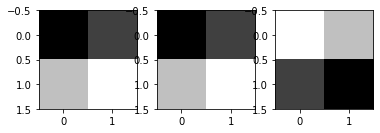

In [91]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)  # (1,2,2,3)
# print(conv2d)

feature_maps = np.swapaxes(conv2d, 0, 3)
# print(feature_maps.shape)

for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(2,2))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(2,2), cmap='gray')
plt.show()

### 고차원 텐서 연습

In [92]:
a = np.arange(12).reshape(3,2,2)
print(a)
b = np.swapaxes(a, 0, 1)
print(b)

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]
[[[ 0  1]
  [ 4  5]
  [ 8  9]]

 [[ 2  3]
  [ 6  7]
  [10 11]]]


In [93]:
a = np.arange(12).reshape(3,2,2)
b = np.swapaxes(a, 1, 2)
print(b)

[[[ 0  2]
  [ 1  3]]

 [[ 4  6]
  [ 5  7]]

 [[ 8 10]
  [ 9 11]]]


In [94]:
a = np.arange(12).reshape(3,2,2)
b = np.swapaxes(a, 0, 2)
print(b)

[[[ 0  4  8]
  [ 2  6 10]]

 [[ 1  5  9]
  [ 3  7 11]]]


In [95]:
a = np.arange(12).reshape(3,2,2)  
b = np.transpose(a, (2,0,1)) 
print(b)

[[[ 0  2]
  [ 4  6]
  [ 8 10]]

 [[ 1  3]
  [ 5  7]
  [ 9 11]]]


In [96]:
a = np.arange(24).reshape(2,3,2,2)
b = np.swapaxes(a, 0, 2) 
print(b)

[[[[ 0  1]
   [12 13]]

  [[ 4  5]
   [16 17]]

  [[ 8  9]
   [20 21]]]


 [[[ 2  3]
   [14 15]]

  [[ 6  7]
   [18 19]]

  [[10 11]
   [22 23]]]]


In [98]:
a = np.arange(24).reshape(2,3,2,2)  
b = np.transpose(a, (2,3,0,1)) 
print(b)

[[[[ 0  4  8]
   [12 16 20]]

  [[ 1  5  9]
   [13 17 21]]]


 [[[ 2  6 10]
   [14 18 22]]

  [[ 3  7 11]
   [15 19 23]]]]


In [99]:
a = np.arange(24).reshape(2,3,2,2)  
b = np.transpose(a, (3,0,1,2)) 
print(b)

[[[[ 0  2]
   [ 4  6]
   [ 8 10]]

  [[12 14]
   [16 18]
   [20 22]]]


 [[[ 1  3]
   [ 5  7]
   [ 9 11]]

  [[13 15]
   [17 19]
   [21 23]]]]


conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


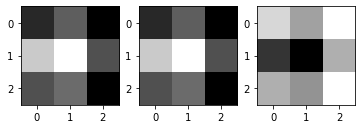

In [100]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
# print(conv2d)

feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

In [101]:
image = tf.constant(  [[ 
                         [[1,0,1],[1,1,1],[1,1,1],[0,0,1],[0,1,0]], 
                         [[0,0,1],[1,1,1],[1,1,1],[1,1,1],[0,0,0]], 
                         [[0,0,0],[0,0,0],[1,1,0],[1,1,1],[1,0,1]], 
                         [[0,0,0],[0,0,1],[1,1,1],[1,1,1],[0,1,0]], 
                         [[0,1,0],[1,1,1],[1,1,1],[0,0,0],[0,0,0]] 
                      ]],     dtype=np.float32)
print(image.shape)
print(image)

(1, 5, 5, 3)
tf.Tensor(
[[[[1. 0. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   [0. 0. 1.]
   [0. 1. 0.]]

  [[0. 0. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [1. 1. 0.]
   [1. 1. 1.]
   [1. 0. 1.]]

  [[0. 0. 0.]
   [0. 0. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   [0. 1. 0.]]

  [[0. 1. 0.]
   [1. 1. 1.]
   [1. 1. 1.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 5, 5, 3), dtype=float32)


In [102]:
maps = np.swapaxes(image, 0, 3)
print(maps.shape)
for i, map in enumerate(maps):
    print(map.reshape(5,5))

(3, 5, 5, 1)
[[1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]
[[0. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0.]]
[[1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]


In [103]:
weight = np.array( [ 
                     [[[1],[0],[-1]], [[0],[-1],[0]], [[1],[0],[0]]],
                     [[[0],[-1],[0]], [[1],[1],[1]], [[0],[-1],[0]]],
                     [[[1],[1],[0]], [[0],[-1],[0]], [[1],[0],[-1]]]
                   ] )

print(weight.shape)
# maps = np.swapaxes(weight, 1, 2)
# maps = np.swapaxes(maps, 0, 1)

maps = np.transpose(weight,(2,0,1,3))

for i, map in enumerate(maps):
    print(map.reshape(3,3))

(3, 3, 3, 1)
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [104]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=3, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))

conv2d.shape (1, 3, 3, 1)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]


In [105]:
weight = np.array( [ 
                     [[[1,1],[0,1],[-1,-1]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[0,0]]],
                     [[[0,0],[-1,0],[0,0]], [[1,1],[1,1],[1,1]], [[0,0],[-1,0],[0,0]]],
                     [[[1,1],[1,1],[0,0]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[-1,-1]]]
                   ] )

print(weight.shape)  # (3,3,3,2)
maps = np.swapaxes(weight, 1, 2)
maps = np.swapaxes(maps, 0, 1)

for map in maps:
    map = np.swapaxes(map, 1, 2)
    map = np.swapaxes(map, 0, 1)
    for filter in map:
        print(filter)

(3, 3, 3, 2)
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [106]:
# (3,3,3,2) => (3,2,3,3)
weight = np.array( [ 
                     [[[1,1],[0,1],[-1,-1]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[0,0]]],
                     [[[0,0],[-1,0],[0,0]], [[1,1],[1,1],[1,1]], [[0,0],[-1,0],[0,0]]],
                     [[[1,1],[1,1],[0,0]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[-1,-1]]]
                   ] )

maps = np.transpose(weight, (2,3,0,1) )

for map in maps:
    for filter in map:
        print(filter)

[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [107]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=2, kernel_size=3, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)  # (1,3,3,2)
feature_maps = np.swapaxes(conv2d, 0, 3)
for feature_map in feature_maps:
    print(feature_map.reshape(3,3))

conv2d.shape (1, 3, 3, 2)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]
[[7. 5. 7.]
 [2. 6. 7.]
 [5. 7. 8.]]


### 맥스 풀링 테스트

In [108]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='valid')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


In [109]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='same')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [110]:
image = tf.constant([[[[0],[1],[2],[3]],
                      [[4],[5],[6],[7]],
                      [[8],[9],[10],[11]],
                      [[12],[13],[14],[15]]]], dtype=np.float32)
print(image.shape)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid')(image)
print(pool.shape)
print(pool.numpy())

(1, 4, 4, 1)
(1, 2, 2, 1)
[[[[ 5.]
   [ 7.]]

  [[13.]
   [15.]]]]


In [111]:
a = np.arange(16)
a = np.random.permutation(a)
a = a.reshape(1,4,4,1)
print(a.reshape(4,4))

[[ 2 12 11  4]
 [ 7  3 15  1]
 [ 8  0 13  9]
 [10  5  6 14]]


In [112]:
image = tf.constant(a, dtype=np.float32)
print(image.shape)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid')(image)
print(pool.shape)
print(pool.numpy())

(1, 4, 4, 1)
(1, 2, 2, 1)
[[[[12.]
   [15.]]

  [[10.]
   [14.]]]]


(60000, 28, 28)
(28, 28)


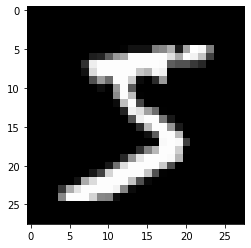

In [113]:
mnist = tf.keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

print(train_images.shape)
img = train_images[0]
print(img.shape)
plt.imshow( img, cmap='gray')
plt.show()

(28, 28)
(1, 28, 28, 1)
(1, 28, 28, 1)
conv2d.shape (1, 28, 28, 5)


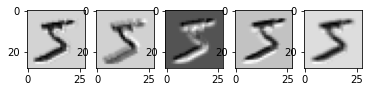

In [114]:
img = train_images[0]
print(img.shape)
img = img.reshape(-1,28,28,1)
print(img.shape)
img = tf.convert_to_tensor(img)
print(img.shape)

weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=3, padding='same' 
                                , kernel_initializer=weight_init)(img)
print("conv2d.shape", conv2d.shape)  # (1,28,28,5)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(28,28), cmap='gray')
plt.show()

(1, 14, 14, 5)


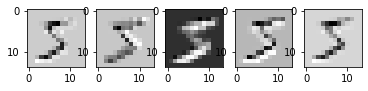

In [115]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid')(conv2d)
print(pool.shape)
feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

### 시그모이드 함수

In [116]:
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

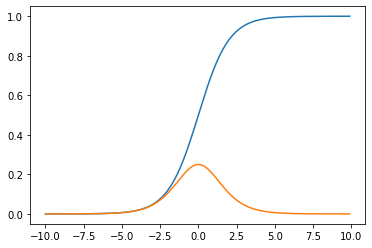

In [118]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.arange(-10,10,0.1)
y = sigmoid(x)
z = y*(1-y)
plt.plot(x,y)
plt.plot(x,z)
plt.show()

### tanh 함수

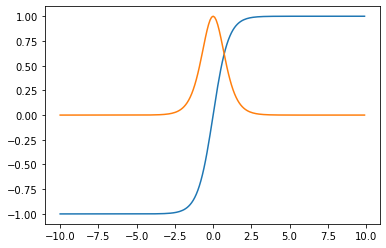

In [120]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def tanh(x):
#     return 2*sigmoid(2*x)-1
    return np.tanh(x)

x = np.arange(-10,10,0.1)
y = tanh(x)
z = 1-y**2
plt.plot(x,y)
plt.plot(x,z)
plt.show()

### Relu 함수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0,x)

x = np.arange(-10,10,0.1)
y = relu(x)

plt.plot(x,y)

plt.show()